<a href="https://colab.research.google.com/github/PolygonumAviculare/NN_Numbers/blob/master/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Konwolucyjna Sieć Neuronowa - MNIST

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Liczba danych traningowych:  60000
Liczba danych testowych:  10000
Rozmiar pojedynczego obrazka:  (28, 28)


(-0.5, 27.5, 27.5, -0.5)

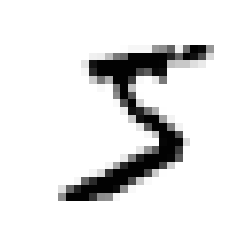

In [0]:
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

print('Liczba danych traningowych: ', X_train.shape[0])
print('Liczba danych testowych: ', X_test.shape[0])
print ('Rozmiar pojedynczego obrazka: ', X_train[0].shape)

import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

In [0]:
print(keras.backend.image_data_format())


channels_last


In [0]:
img_rows, img_cols = 28,28
if K.image_data_format() == 'channel_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1,img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0],  img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0],  img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
    
print (input_shape)

(28, 28, 1)


In [0]:
X_train  = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape)

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


(60000, 28, 28, 1)


In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
________________________________________

In [0]:
model.compile(optimizer='adadelta', loss ="categorical_crossentropy", metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=128,epochs=20, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 151s 3ms/step - loss: 0.1941 - acc: 0.9391 - val_loss: 0.0521 - val_acc: 0.9827
Epoch 2/20
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0489 - acc: 0.9850 - val_loss: 0.0385 - val_acc: 0.9871
Epoch 3/20
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0304 - acc: 0.9904 - val_loss: 0.0329 - val_acc: 0.9892
Epoch 4/20
60000/60000 [==============================] - 150s 2ms/step - loss: 0.0206 - acc: 0.9932 - val_loss: 0.0310 - val_acc: 0.9898
Epoch 5/20
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0149 - acc: 0.9953 - val_loss: 0.0314 - val_acc: 0.9899
Epoch 6/20
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0095 - acc: 0.9972 - val_loss: 0.0359 - val_acc: 0.9892
Epoch 7/20
60000/600

In [0]:

def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['acc'], history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()

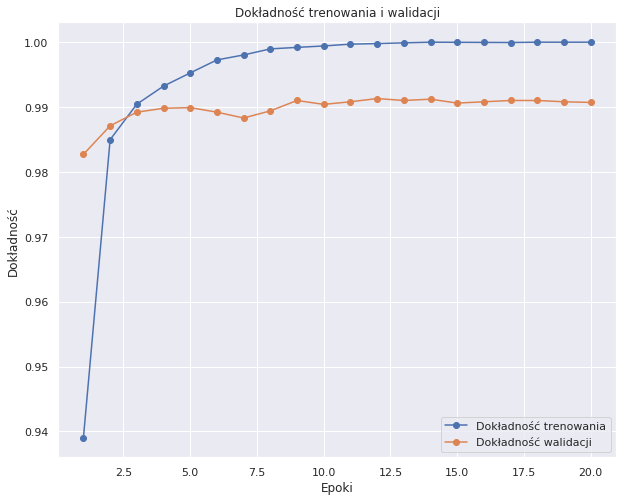

In [0]:
make_accuracy_plot(history)

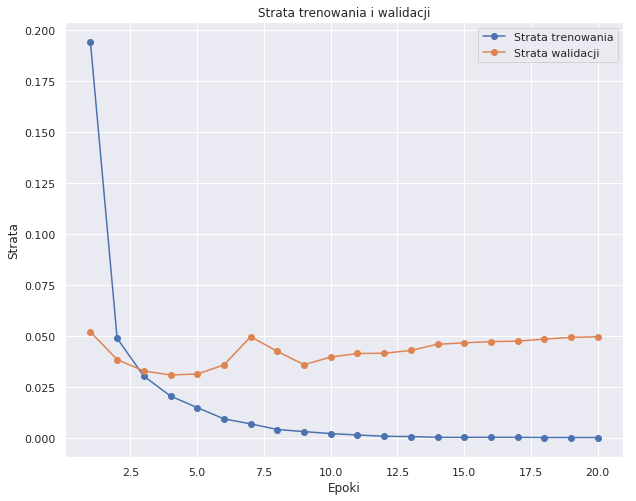

In [0]:
make_loss_plot(history)


In [0]:
history = model.fit(X_train, y_train, batch_size=128,epochs=4, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/4





60000/60000 [==============================] - 15s 257us/step - loss: 0.1895 - acc: 0.9432 - val_loss: 0.0600 - val_acc: 0.9806
Epoch 2/4
60000/60000 [==============================] - 8s 133us/step - loss: 0.0458 - acc: 0.9861 - val_loss: 0.0461 - val_acc: 0.9847
Epoch 3/4
60000/60000 [==============================] - 8s 134us/step - loss: 0.0288 - acc: 0.9913 - val_loss: 0.0373 - val_acc: 0.9881
Epoch 4/4
60000/60000 [==============================] - 8s 133us/step - loss: 0.0194 - acc: 0.9941 - val_loss: 0.0318 - val_acc: 0.9893
